In diesem notebook soll ein SDG Regression verwendet werden um eine Vorhersage über den Umsatz von Croissants in anhängigkeit unserer features zu berechnen. 
Dazu haben wir einen Trainingsdatensatz (01.07.2013 - 31.07.20218), welchen wir nutzen um dazu die Vorghersagen auf einen Testdatensatz (01.08.2018 - 30.07.2019) zu machen. Diese werden dann in kaggle hohchgeladen.

In [49]:
#import packages for data handling and sdg regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics


In [50]:
#load data
#trainigsamples
data_train = pd.read_csv('../../0_DataPreparation/00_data/Trainingsdaten_long.csv')
print(data_train.head())
print(data_train.shape)

#validation samples
data_val = pd.read_csv('../../0_DataPreparation/00_data/Validierungsdaten_long.csv')
print(data_val.head())
print(data_val.shape)


        Datum      Umsatz  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
0  2013-07-01  148.828353              1              0              0   
1  2013-07-02  159.793757              1              0              0   
2  2013-07-03  111.885594              1              0              0   
3  2013-07-04  168.864941              1              0              0   
4  2013-07-05  171.280754              1              0              0   

   Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
0              0              0              0               0          0   
1              0              0              0               0          0   
2              0              0              0               0          0   
3              0              0              0               0          0   
4              0              0              0               0          0   

   ...  Samstag  Sonntag   VPI  Number_of_ships  Ship  Heimspiel  Feiertag  \
0  ...        

In [51]:
#extract the croissant data (warengruppe =3)
training_data = data_train[data_train['Warengruppe_3']==1]
print(training_data.shape)

validation_data = data_val[data_val['Warengruppe_3']==1]
print(validation_data.shape)

(1462, 39)
(357, 39)


In [52]:
#extract the target variable
y_train = training_data['Umsatz']
print(y_train.head())
print(y_train.shape)
y_val = validation_data['Umsatz']

#extract the features
features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3','Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6','Ship', 'is_holiday']
x_train = training_data[features]
x_val = validation_data[features]
print(x_train.head())
print(x_train.shape)


2924    201.198426
2925    265.261254
2926    210.260241
2927    190.686641
2928    181.644870
Name: Umsatz, dtype: float64
(1462,)
      Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
2924              0              0              1              0   
2925              0              0              1              0   
2926              0              0              1              0   
2927              0              0              1              0   
2928              0              0              1              0   

      Warengruppe_5  Warengruppe_6  Ship  is_holiday  
2924              0              0     0           1  
2925              0              0     0           1  
2926              0              0     0           1  
2927              0              0     0           1  
2928              0              0     1           1  
(1462, 8)


In [53]:
#train the sgd regression model
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(x_train, y_train)



SGDRegressor(random_state=42)

In [54]:
# Make predictions on the test set
sgd_predictions = sgd_model.predict(x_val)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [210.37133325 210.37133325 210.37133325 210.37133325 210.37133325]


In [55]:
# Calculate error metrics
mae = mean_absolute_error(y_val, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_val, sgd_predictions)  # Mean Squared Error
mape = (abs((y_val - sgd_predictions) / y_val).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 51.50
Mean Squared Error (MSE): 4059.73
Mean Absolute Percentage Error (MAPE): 38.63%


/tmp/ipykernel_55888/4123917379.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color="red")


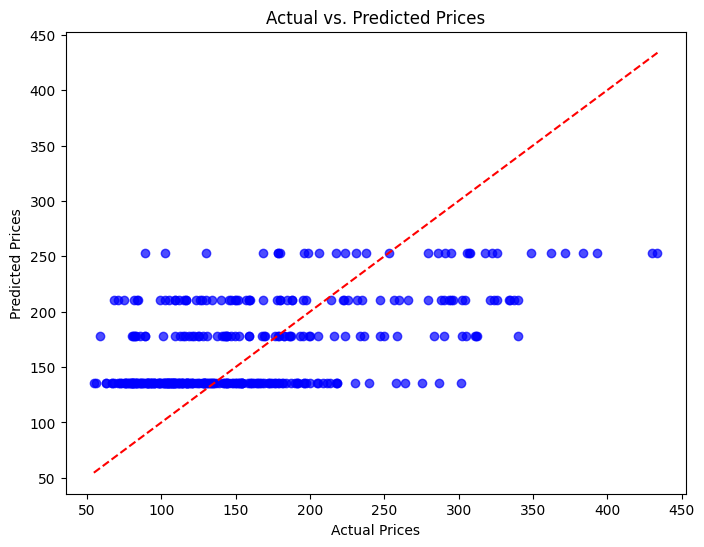

In [56]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()


Oben hatte ich als features nur ship und is_holiday genommen, was natürlich super wenig ist und dadurch kommen diese komisvchen vorhersagen raus. Nun auch einmal noch mit allen anderen warengruppen und wetterdaten versuchen

In [57]:
#get the column name of the features
print(data_train.columns)
features_all = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3',
       'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temp_Very_Cold',
       'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 'Cloud_Clear',
       'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate',
       'Wind_Strong', 'Weather_Good', 'Weather_Light_Issues',
       'Weather_Moderate', 'Weather_Severe', 'KielerWoche', 'Montag',
       'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag',
        'Number_of_ships', 'Ship', 'Heimspiel', 'Feiertag', 'is_holiday',
       'Weihnachtsmarkt', 'Markt']
x_train2 = training_data[features_all]
x_val2 = validation_data[features_all]
print(x_train2.head())
print(x_train2.shape)

y_train2 = training_data['Umsatz']
y_val2 = validation_data['Umsatz']

Index(['Datum', 'Umsatz', 'Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3',
       'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temp_Very_Cold',
       'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 'Cloud_Clear',
       'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate',
       'Wind_Strong', 'Weather_Good', 'Weather_Light_Issues',
       'Weather_Moderate', 'Weather_Severe', 'KielerWoche', 'Montag',
       'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag',
       'VPI', 'Number_of_ships', 'Ship', 'Heimspiel', 'Feiertag', 'is_holiday',
       'Weihnachtsmarkt', 'Markt'],
      dtype='object')
      Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
2924              0              0              1              0   
2925              0              0              1              0   
2926              0              0              1              0   
2927              0              0              1              0   
2928     

In [58]:
#train the model with all features
sgd_model2 = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model2.fit(x_train2, y_train2)

SGDRegressor(random_state=42)

In [59]:
#get the predictions
sgd_predictions2 = sgd_model2.predict(x_val2)
print("Predictions for test data:", sgd_predictions2[:5])  # Display first 5 predictions


Predictions for test data: [248.98269366 260.28914533 255.39601125 205.2986863  321.47337313]


In [60]:
# Calculate error metrics
mae = mean_absolute_error(y_val2, sgd_predictions2)  # Mean Absolute Error
mse = mean_squared_error(y_val2, sgd_predictions2)  # Mean Squared Error
mape = (abs((y_val2 - sgd_predictions2) / y_val2).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 35.35
Mean Squared Error (MSE): 2104.21
Mean Absolute Percentage Error (MAPE): 25.03%


/tmp/ipykernel_55888/2426045811.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val2.min(), y_val2.max()], [y_val2.min(), y_val2.max()], 'k--', color="red")


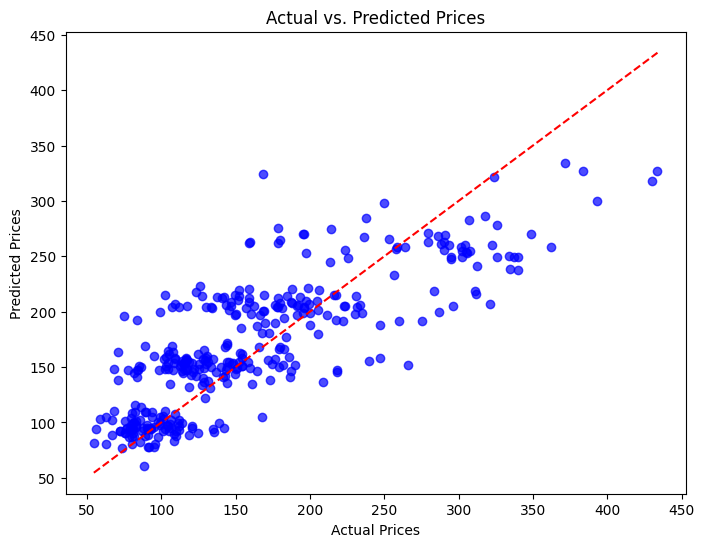

In [61]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val2, sgd_predictions2, alpha=0.7, color="blue")
plt.plot([y_val2.min(), y_val2.max()], [y_val2.min(), y_val2.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

Wenn als features nur ship, is_holiday und alle andere Warengruppen dabei sind, dann habe ich einen MAPE von 38,68% was ok aber nicht super ist.
Nehme ich alle features mit rein (Auser Inflation), dann komme ich auf einen MAPE von 25.03% also deutlich besser. 
Ich werde also das Modell mit allen features verwenden um eine Vorhersage für den Testzeitraum zu treffen

In [62]:
#load the test data
data_test = pd.read_csv('../../0_DataPreparation/00_data/Testdaten.csv')
print(data_test.head())
print(data_test.tail())

        id       Datum  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
0  1808011  2018-08-01              1              0              0   
1  1808021  2018-08-02              1              0              0   
2  1808031  2018-08-03              1              0              0   
3  1808041  2018-08-04              1              0              0   
4  1808051  2018-08-05              1              0              0   

   Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
0              0              0              0               0          0   
1              0              0              0               0          0   
2              0              0              0               0          0   
3              0              0              0               0          0   
4              0              0              0               0          0   

   ...  Samstag  Sonntag    VPI  Number_of_ships  Ship  Heimspiel  Feiertag  \
0  ...        0        0  104.5

In [63]:
#test daten vorbereiten
#nach croissants filtern
test_data = data_test[data_test['Warengruppe_3']==1]
print(test_data.shape)
print(test_data.head())
print(test_data.tail())

#nur die features nehmen, die auch im training vorhanden sind
x_test = test_data[features_all]
print(x_test.head())

(355, 39)
          id       Datum  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
710  1808013  2018-08-01              0              0              1   
711  1808023  2018-08-02              0              0              1   
712  1808033  2018-08-03              0              0              1   
713  1808043  2018-08-04              0              0              1   
714  1808053  2018-08-05              0              0              1   

     Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
710              0              0              0               0          0   
711              0              0              0               0          0   
712              0              0              0               0          0   
713              0              0              0               0          0   
714              0              0              0               0          0   

     ...  Samstag  Sonntag    VPI  Number_of_ships  Ship  Heimspiel  Feierta

In [64]:
#vorhersagen für testadaten 
sgd_predictions_test = sgd_model2.predict(x_test)
print("Predictions for test data:", sgd_predictions_test[:5])  # Display first 5 predictions

Predictions for test data: [239.64921918 232.7366754  239.3209648  307.51273499 313.22297977]


In [65]:
#predictions in testdaten einfügen
test_data['Umsatz_pred'] = sgd_predictions_test
print(test_data.head())
print(test_data.tail())

          id       Datum  Warengruppe_1  Warengruppe_2  Warengruppe_3  \
710  1808013  2018-08-01              0              0              1   
711  1808023  2018-08-02              0              0              1   
712  1808033  2018-08-03              0              0              1   
713  1808043  2018-08-04              0              0              1   
714  1808053  2018-08-05              0              0              1   

     Warengruppe_4  Warengruppe_5  Warengruppe_6  Temp_Very_Cold  Temp_Cold  \
710              0              0              0               0          0   
711              0              0              0               0          0   
712              0              0              0               0          0   
713              0              0              0               0          0   
714              0              0              0               0          0   

     ...  Sonntag    VPI  Number_of_ships  Ship  Heimspiel  Feiertag  \
710  ...      

/tmp/ipykernel_55888/2858737107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Umsatz_pred'] = sgd_predictions_test


In [66]:
#nur die relevanten spalten behalten
test_data = test_data[['id','Umsatz_pred']]
print(test_data.head())
print(test_data.tail())

          id  Umsatz_pred
710  1808013   239.649219
711  1808023   232.736675
712  1808033   239.320965
713  1808043   307.512735
714  1808053   313.222980
           id  Umsatz_pred
1060  1907263   255.661072
1061  1907273   329.267266
1062  1907283   335.283072
1063  1907293   259.264340
1064  1907303   256.570224


In [67]:
#export the data as csv
test_data.to_csv('../Criossants_sample_submission.csv', index=False)